#### 

## Part 2: Analyzing Tweets and Author Data

In the first part, we gathered our tweets data based on our query, and then we gathered the data for the authors who have made those tweets.
In this part of the project, we read our collected data and do the analysis based on our objectives.

### Objectives for Analysis:
* Finding top 10 frequent hashtags 
* Finding top 10 referred users
* Finding top 3 most influential tweets and the authors who made these tweets.
* Finding top 3 most vocal authors
* FInding most influential authors.
* Finding tweets trend during time
* Finding top sources for tweets
* Building the word cloud for all tweets
* Doing Tweets Sentiment Analysis based on the each tweets text including average polarity, sensitivity, and do related visualization
* More analysis based on the author verification status

### Requirements:
We need the below packages for this project:
* nlkt
* textblob
* collections
* matplotlib
* json
* pandas
* numpy
* datatime
* pprint
* wordcloud
* string
* os
* TextBlob
We import all of them:

In [407]:
import json #to work with json files
import os #to change directory and read our former files.
import nltk #a package for natural language processing. We use it for sentiment analysis
nltk.download('punkt')
from collections import Counter #for counting the words.
import matplotlib.pyplot as plt #for doing our visualizations
import pandas as pd 
import numpy as np
import datetime
import pprint
import string
from wordcloud import WordCloud #for making the wordcloud
from textblob import TextBlob #for Sentiment Analysis

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/darianghorbanian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Note that you should install any packages if you have not formerly.
Now, we can start:
### Reading our data from the first part

Pay attention that directories will vary in your machine:

In [98]:
os.getcwd() #finding our directory

'/Users/darianghorbanian/Documents/GitHub/MahsaAmini-Twitts-Analysis/02-Analysis'

In [99]:
os.chdir('/Users/darianghorbanian/Documents/GitHub/MahsaAmini-Twitts-Analysis/01-Collecting Data')

In [101]:
#reading tweets' data from first part
with open('recent_post_"Mahsa Amini" -is-retweet lang-en_10000.json') as json_file:
    tweets_data=json.load(json_file)

10000

In [95]:
#reading authors' data from fist part
with open('author_data.json') as json_file:
    authors_data=json.load(json_file)

In [96]:
os.chdir('/Users/darianghorbanian/Documents/GitHub/MahsaAmini-Twitts-Analysis/02-Analysis')
#backing to our direction

### Finding Top 10 Hashtags:
For finding top 10 hashtags, first step is to collect all the tweets' text and then count the words that start with #. So, we will have a list of words that includes the text of all tweets:

In [42]:
words=[] #we make a null primary list
for tweet in tweets_data['tweets']:
    words.extend(tweet['text'].split()) #take care to use split function to have the words of each text, otherwise you'll get only charchters
    #we should use split method to receive the text of each tweet as a list of words
print(type(words))
print(len(words))

<class 'list'>
235590


As we see, for this 10000 tweets, we have a list of 235590 words.

We imported Counter at the beginning, now we use it for Hashtages, but first we need to have a list of words with that start with Hashtag:

In [45]:
w_h=[]
for w in words:
    if w.startswith('#'):
        w_h.append(w)
c_h = Counter(w_h)
c_h.most_common(10)

[('#Mahsa_Amini', 5769),
 ('#مهسا_امینی', 4227),
 ('#اعتصابات_سراسری', 2041),
 ('#OpIran', 1822),
 ('#Mahsa_Amini\u200c', 1697),
 ('#MahsaAmini', 1334),
 ('#IranRevolution', 621),
 ('#IranRevolution2022', 584),
 ('#Iran', 516),
 ('#کیرم_تو_بیت_رهبری', 476)]

We found the top 10 Hashtags.

### Finding top 10 most frequent mentioned user names:
Similarly, we would collect worlds starting with @

In [44]:
w_ur=[]
for w in words:
    if w.startswith('@'):
        w_ur.append(w)
c_ur = Counter(w_ur)
c_ur.most_common(10)

[('@DEonHumanRights', 404),
 ('@EP_Justice', 404),
 ('@POTUS', 366),
 ('@EP_President', 340),
 ('@UN', 291),
 ('@SecBlinken', 189),
 ('@EmmanuelMacron', 177),
 ('@SpeakerPelosi', 155),
 ('@EU_Commission', 148),
 ('@IRIMFA_EN', 144)]

### Finding top 3 most influential tweets with their authors name:
For finding the tweet, influential score, we will count the tweet_influence_score by summing the following parameters:
* quote_count
* reply_count
* retweet_count
* like_count
All of these paramters for the first tweet are at tweets_data['tweets'][0]['publice_metrics'] . So, we would use for collecting these data:

In [452]:
tweets_data['tweets'][0]['public_metrics'].keys() #understanding data

dict_keys(['retweet_count', 'reply_count', 'like_count', 'quote_count'])

In [303]:
tweets_score=[] #initializing
tweets_author_id=[]
tweets_text=[]
for i in range(0,len(tweets_data['tweets'])):
    tweets_score.append(sum(tweets_data['tweets'][i]['public_metrics'].values()))
    tweets_author_id.append(tweets_data['tweets'][i]['author_id'])
    tweets_text.append(tweets_data['tweets'][i]['text'])
tweets_df= pd.DataFrame()
tweets_df['Tweet Text']=tweets_text
tweets_df['Tweet Score']=tweets_score
tweets_df['Author ID']=tweets_author_id
tweets_df.head(5) #understanding data

,Tweet Text,Tweet Score,Author ID
0,@IranIntl #Mahsa_Amini #MahsaAmini #مهسا_‌‌‌‌‌...,0,1572607839310417929
1,People protest following the death of Mahsa Am...,1,9683842
2,"To avoid similar repression of women in USA, V...",0,775787766277926912
3,@1500tasvir @esmaeilion #Mahsa_Amini #MahsaAmi...,0,1572607839310417929
4,Tens of thousands of people joined a #Berlin r...,0,1556007682217332736


A pandas dataframe is made. Now, we can recall our authors_data to figure out our authors name and usernames to enrich this dataframe.
For this, we will firstly make a pandas dataframe for authors, and then join our two dataframe via the author_id.

In [150]:
authors_data[0].keys()# understanding data

dict_keys(['description', 'id', 'verified', 'public_metrics', 'username', 'name', 'created_at'])

In [197]:
authors_name=[]
authors_username=[]
author_id=[]
authors_verified=[] #we will also add the authors verifcation status to our dataframe
for i in range(0,len(authors_data)):
    author_id.append(authors_data[i]['id'])
    authors_name.append(authors_data[i]['name'])
    authors_username.append(authors_data[i]['username'])
    authors_verified.append(authors_data[i]['verified'])
author_df=pd.DataFrame()
author_df['Author ID']=author_id
author_df['Author Name']=authors_name
author_df['Author Username']=authors_username
author_df['Author Verified']=authors_verified
author_df.head(5) #understanding data

,Author ID,Author Name,Author Username,Author Verified
0,1572607839310417929,Golnaz,_igolnaz,False
1,9683842,Kevin Coombs,coombskj,False
2,775787766277926912,Terry L. Barber,starheart43,False
3,1556007682217332736,Zoom News,zoomnewskrd,False
4,1286593340167860235,Sufi,Sufi12260482,False


#### Joining Author and Tweets Data:

In [198]:
total_df = tweets_df.merge(author_df,how='left',on='Author ID')
total_df.head(5) #understanding data

,Tweet Text,Tweet Score,Author ID,Author Name,Author Username,Author Verified
0,@IranIntl #Mahsa_Amini #MahsaAmini #مهسا_‌‌‌‌‌...,0,1572607839310417929,Golnaz,_igolnaz,False
1,People protest following the death of Mahsa Am...,1,9683842,Kevin Coombs,coombskj,False
2,"To avoid similar repression of women in USA, V...",0,775787766277926912,Terry L. Barber,starheart43,False
3,@1500tasvir @esmaeilion #Mahsa_Amini #MahsaAmi...,0,1572607839310417929,Golnaz,_igolnaz,False
4,Tens of thousands of people joined a #Berlin r...,0,1556007682217332736,Zoom News,zoomnewskrd,False


Now, we can find top 3 tweets regarding their influence:

In [242]:
top_3_tweet = total_df.sort_values('Tweet Score', ascending = False).head(3)[['Tweet Text','Tweet Score','Author Name', 'Author Username', 'Author Verified']]
top_3_tweet=top_3_tweet.reset_index()
for i in range(0,len(top_3_tweet)):
    print ('Number ' + str(i+1)+' most influential tweets with the score ' + str(top_3_tweet['Tweet Score'][i]) + ' made by ' + top_3_tweet['Author Name'][i] +' is:')
    print(top_3_tweet['Tweet Text'][i]) 
    print()
    print()

Number 1 most influential tweets with the score 6904 made by Pouria Zeraati is:
Today, Iranians in Berlin showed the world what they stand for &amp; stand by; We all stand for freedom and justice for Iranian people - and against the regime!

#Mahsa_Amini
#مهسا_امینی 

https://t.co/tNTG2pGOZG


Number 2 most influential tweets with the score 4633 made by Masih Alinejad 🏳️ is:
This is Mahsa Amini singing, dancing…. 
The Islamic Republic of Iran’s morality police killed her just because a little bit of her hair was shown. She was only 22 years old. 
Her name became a symbol of resistance against gender apartheid regime. 
#MahsaAmini
#مهسا_امینی https://t.co/QH5F0Mv38L


Number 3 most influential tweets with the score 4402 made by Masih Alinejad 🏳️ is:
Massive anti-regime protests in Iran today AND Berlin.

In this clip of Berlin, thousands chant: 

“Death to Khamenei!”
Woman Life Freedom
#Mahsa_Amini #IranRevolution #b2210
#مهسا_امینی #زن_زندگی_آزادی https://t.co/INWQLGEpCJ




### Finding top 3 Vocal Authors:
For this, we will find the authors who made the most number of tweets. We will use our total_df

In [454]:
total_df['Author Name'].value_counts().head(3)

Freedom for Iran    398
𝘔𝘦𝘥𝘢                333
Nemo                208
Name: Author Name, dtype: int64

### Finding 3 most Influential Authors:
The influence score for authors is not dependent to our tweets data. We want just to know among our authors, who are generally higher influential authors. For this, we will calculate sum of followings:
* followers_count
* following_count
* listed_count
* tweet_count
So, we will just work with our datasets for authors. Similar the way we did for finding highest tweets scores:

In [455]:
authors_data[0]['public_metrics'] #understanding data

{'followers_count': 4,
 'following_count': 75,
 'tweet_count': 1577,
 'listed_count': 0}

In [456]:
author_influence_score=[]
for i in range(0,len(authors_data)):
    author_influence_score.append(sum(authors_data[i]['public_metrics'].values()))
author_df['Author Influence'] = author_influence_score
author_df.head(5) #understanding data

,Author ID,Author Name,Author Username,Author Verified,Author Influence
0,1572607839310417929,Golnaz,_igolnaz,False,1656
1,9683842,Kevin Coombs,coombskj,False,5914
2,775787766277926912,Terry L. Barber,starheart43,False,5319
3,1556007682217332736,Zoom News,zoomnewskrd,False,534
4,1286593340167860235,Sufi,Sufi12260482,False,2031


In [457]:
top_3_authors = author_df.sort_values('Author Influence',ascending=False).head(3)
top_3_authors

,Author ID,Author Name,Author Username,Author Verified,Author Influence
1395,1652541,Reuters,Reuters,True,26665285
1423,14293310,TIME,TIME,True,19916024
400,51241574,The Associated Press,AP,True,16522938


The top influential authors are non-Iranian press companies who are also talking about Iran Protests

### Finding Tweet Trends Over Time:
Actualy, in this part we want to understand at which times of day, tweet most. We have the creation details of each tweet in our tweets_data. So, we will find the time and plot to find trends:

In [458]:
tweets_data['tweets'][0]['created_at'] #understanding data
tweet_created_at=[]
for i in range(0,len(tweets_data['tweets'])):
    tweet_created_at.append(tweets_data['tweets'][i]['created_at'])
tweet_created_at= pd.to_datetime(tweet_created_at)
total_df['day'] = pd.DatetimeIndex(tweet_created_at).day
total_df['hour'] = pd.DatetimeIndex(tweet_created_at).hour
total_df['minute'] = pd.DatetimeIndex(tweet_created_at).minute
total_df.head(5) #understanding data

,Tweet Text,Tweet Score,Author ID,Author Name,Author Username,Author Verified,day,hour,minute,Tweet Source,polarity,subjectivity
0,@IranIntl #Mahsa_Amini #MahsaAmini #مهسا_‌‌‌‌‌...,0,1572607839310417929,Golnaz,_igolnaz,False,22,18,19,Twitter Web App,0.000000,0.000000
1,People protest following the death of Mahsa Am...,1,9683842,Kevin Coombs,coombskj,False,22,18,19,Twitter Web App,0.000000,0.100000
2,"To avoid similar repression of women in USA, V...",0,775787766277926912,Terry L. Barber,starheart43,False,22,18,19,Twitter for iPhone,0.116667,0.383333
3,@1500tasvir @esmaeilion #Mahsa_Amini #MahsaAmi...,0,1572607839310417929,Golnaz,_igolnaz,False,22,18,19,Twitter Web App,0.000000,0.000000
4,Tens of thousands of people joined a #Berlin r...,0,1556007682217332736,Zoom News,zoomnewskrd,False,22,18,19,Twitter for iPhone,0.000000,0.083333


In [325]:
total_df.groupby('minute').count().head(5) #understanding data

,Tweet Text,Tweet Score,Author ID,Author Name,Author Username,Author Verified,day,hour
minute,,,,,,,,
0,180,180,180,180,180,180,180,180
1,198,198,198,198,198,198,198,198
2,179,179,179,178,178,178,179,179
3,181,181,181,181,181,181,181,181
4,175,175,175,175,175,175,175,175


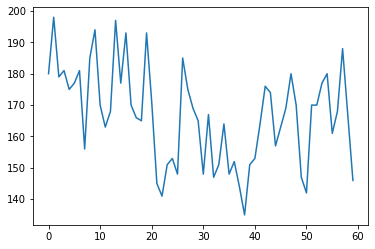

In [327]:
plt.plot(total_df.groupby('minute').count().index,total_df.groupby('minute').count()['Author ID'])

##### Tweets are most made at the first 20 minutes of each hour on average

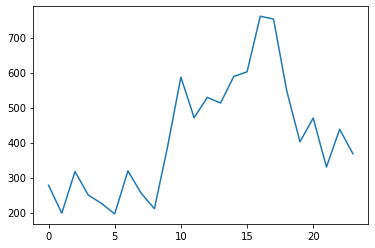

In [328]:
plt.plot(total_df.groupby('hour').count().index,total_df.groupby('hour').count()['Author ID'])

##### Most tweets are done from 10 a.m to 18 p.m 

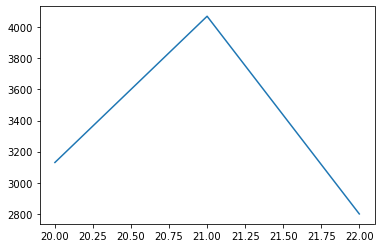

In [329]:
plt.plot(total_df.groupby('day').count().index,total_df.groupby('day').count()['Author ID'])

##### 10,000 tweets are made in almost one day and half

### Finding top 3 sources of tweets:
We can find source from tweets_data. We will go for similar process:

In [339]:
tweet_source=[]
for i in range(0,len(tweets_data['tweets'])):
    tweet_source.append(tweets_data['tweets'][i]['source'])
total_df['Tweet Source']=tweet_source
total_df['Tweet Source'].value_counts().head(3)

Twitter for Android    3656
Twitter for iPhone     3205
Twitter Web App        2719
Name: Tweet Source, dtype: int64

### Building Word Cloud
For building the world cloud, we use word cloud pacakge.
But, some actions are required:
* Removing Stop Words: We use stop words from nltk package. These words are some standards. We should also remove some more words such as all the links which start with https.
* Using only lower Case words
* Removing also non-latin words as the tweets may conclude some persian words
* making a text out of all tweet texts: We will make this text from the list (words) that we made.

##### Finding top 10 frequent words

First, we should define a funtion that gives us if a word includes only latin letters or not. We found this funtion at https://stackoverflow.com/questions/27084617/detect-strings-with-non-english-characters-in-python 

In [383]:
def is_latin(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [404]:
stopwords= nltk.corpus.stopwords.words('english') # using this for standard stopwords
m=['Mahsa_Amini','OpIran','Https','https','mahsa_amini','to','#Mahsa_Amini','#MahsaAmini',
   '#Mahsa_Amini\u200c','#OpIran','Be','The','For']
stopwords.extend(m)

#removing stopwords:
words2=[]
for w in words:
    if w not in stopwords and len(w)>1 and not w.startswith('http') and is_latin(w)==True:
        w = w.replace('.', '') #removing dots
        w = w.replace('?', '') #removing question marks
        w = w.replace(' ', '') #removing any space in words
        words2.append(w.upper())
cw = Counter(words2)
cw.most_common(10)

[('IRANIAN', 2686),
 ('IRAN', 2496),
 ('PEOPLE', 1597),
 ('MAHSA', 1489),
 ('AMINI', 1174),
 ('FREEDOM', 1065),
 ('REGIME', 1058),
 ('ISLAMIC', 991),
 ('SUPPORT', 899),
 ('WOMEN', 864)]

##### preparing text:

In [405]:
text=''
for t in words2:
    text += t + ' '

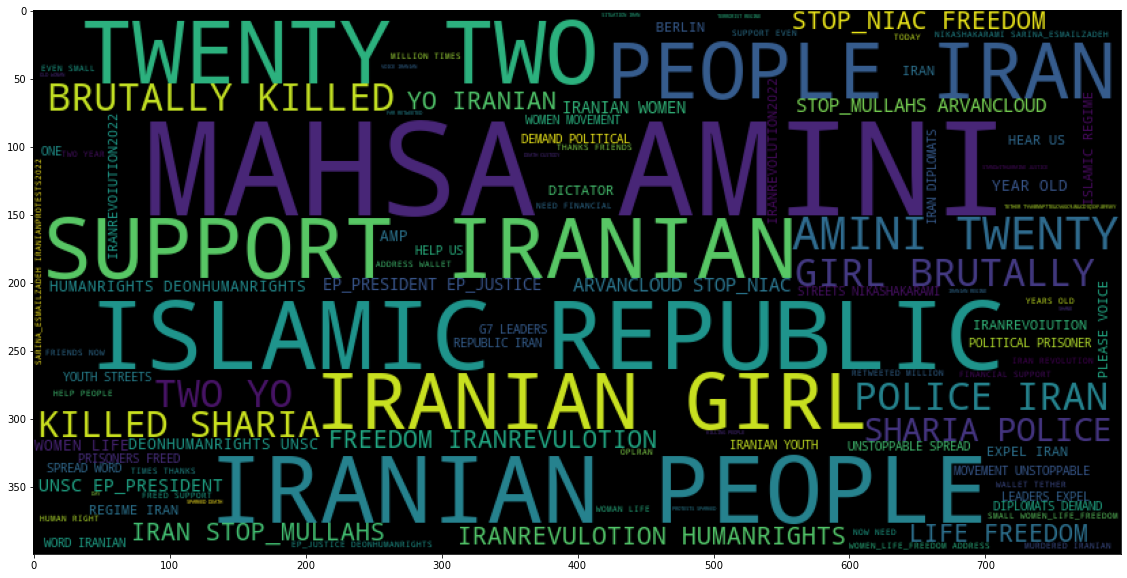

In [449]:
#making the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(text) 
#for having a more organized wordcloud, we limit number of words to 100
plt.figure(figsize=(20,10)) # set up figure size
plt.imshow(wordcloud) # word cloud image show
plt.axis("on") # turn on axis
plt.savefig('my_word_cloud.png') # save as PNG file
plt.savefig('my_word_cloud.pdf') # save as PDF file
plt.show()  # show in Jupyter notebook

## Sentiment Analysis:
Now, we can use sentiment analysis for our tweets data. For this, we use the package TextBlob. We will use our total_df to proceed:
In sentiment analysis, we have two main indexes. One is polarity which shows how much a text is positive or negative and subjectivity which shows how much a text is based on facts or personal opinions. For furthur information, read the following link: https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/.

In [450]:
polarity=[]
subjectivity=[]
for i,t in total_df.iterrows():
    s = TextBlob(t['Tweet Text'])
    polarity.append(s.polarity)
    subjectivity.append(s.subjectivity)
total_df['polarity']=polarity
total_df['subjectivity']=subjectivity
total_df.head(5) #understanding data

,Tweet Text,Tweet Score,Author ID,Author Name,Author Username,Author Verified,day,hour,minute,Tweet Source,polarity,subjectivity
0,@IranIntl #Mahsa_Amini #MahsaAmini #مهسا_‌‌‌‌‌...,0,1572607839310417929,Golnaz,_igolnaz,False,22,18,19,Twitter Web App,0.000000,0.000000
1,People protest following the death of Mahsa Am...,1,9683842,Kevin Coombs,coombskj,False,22,18,19,Twitter Web App,0.000000,0.100000
2,"To avoid similar repression of women in USA, V...",0,775787766277926912,Terry L. Barber,starheart43,False,22,18,19,Twitter for iPhone,0.116667,0.383333
3,@1500tasvir @esmaeilion #Mahsa_Amini #MahsaAmi...,0,1572607839310417929,Golnaz,_igolnaz,False,22,18,19,Twitter Web App,0.000000,0.000000
4,Tens of thousands of people joined a #Berlin r...,0,1556007682217332736,Zoom News,zoomnewskrd,False,22,18,19,Twitter for iPhone,0.000000,0.083333


### Average Polarity and Subjectivity Score:

In [431]:
print('For all 10K tweets, the average polority is ' + str(round(np.mean(total_df['polarity']),4))+ ' and average subjectivity score is '+ str(round(np.mean(total_df['subjectivity']),4)))

For all 10K tweets, the average polority is 0.0244 and average subjectivity score is 0.2339


### Polarity and Subjectivity Histograms:

(array([  55.,  149.,  188.,  884.,  906., 6363.,  724.,  477.,   95.,
         159.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

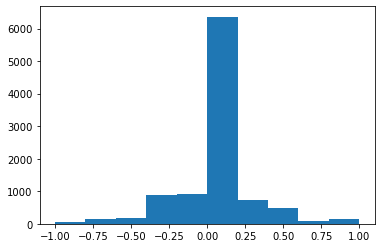

In [432]:
plt.hist(total_df['polarity'])

###### This histogram shows that a majority of tweets are not either positive or negative

(array([5317.,  567.,  722.,  423.,  667.,  916.,  398.,  234.,  205.,
         551.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

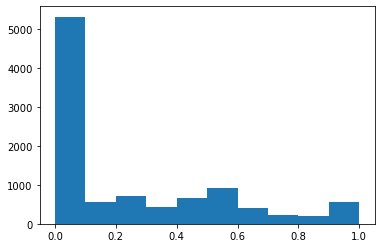

In [433]:
plt.hist(total_df['subjectivity'])

##### This histogram is more or less suprising. A majority of tweets are not based on the personal opinions and they are based on facts. 

### Top 10 most positive tweets:
It is similar as when we wanted to find out top 3 influential tweets.

In [451]:
top_10_pos = total_df.sort_values('polarity', ascending = False).head(10)[['Tweet Text','polarity','Tweet Score','Author Name', 'Author Username', 'Author Verified']]
top_10_pos=top_10_pos.reset_index()
for i in range(0,len(top_10_pos)):
    print ('Number ' + str(i+1)+' most positive tweet with the polarity score ' + str(top_10_pos['polarity'][i]) + ' made by ' + top_10_pos['Author Name'][i] +' is:')
    print(top_10_pos['Tweet Text'][i]) 
    print()
    print()

Number 1 most positive tweet with the polarity score 1.0 made by Paris is:
@black_reward You are the best guys 🤞💪🖤🖤🖤 #Mahsa_Amini‌  #مهسا_امینی


Number 2 most positive tweet with the polarity score 1.0 made by KOU_66bert22 is:
@AshiMashi4U Woman Life Freedom "Mahsa Amini" Perfect T-shirt https://t.co/dIQxFoAmN3


Number 3 most positive tweet with the polarity score 1.0 made by Mehrad is:
@Anonymousnn3 Great! Well done.
#MahsaAmini 
#Mahsa_Amini 
#مهساامینی


Number 4 most positive tweet with the polarity score 1.0 made by Diane is:
@AtenaDaemi So very proud of you ❤️ #Mahsa_Amini‌


Number 5 most positive tweet with the polarity score 1.0 made by Sculptur is:
Beautiful! #مهسا_امینی #زن_زندگی_آزادی
#Mahsa_Amini #IranProtests2022 #StopHazaraGenocide #IranRevolution2022 #OpIran https://t.co/F6uZZMCkAE


Number 6 most positive tweet with the polarity score 1.0 made by Avalon Grail is:
How beautiful you all are! This is how you're meant to be. 
Keep going and don't ever stop. We are with y

### 10 most negative tweets:

In [438]:
top_10_neg = total_df.sort_values('polarity', ascending = True).head(10)[['Tweet Text','polarity','Tweet Score','Author Name', 'Author Username', 'Author Verified']]
top_10_neg=top_10_neg.reset_index()
for i in range(0,len(top_10_neg)):
    print ('Number ' + str(i+1)+' most negative tweet with the polarity score ' + str(top_10_neg['polarity'][i]) + ' made by ' + top_10_neg['Author Name'][i] +' is:')
    print(top_10_neg['Tweet Text'][i]) 
    print()
    print()

Number 1 most negative tweet with the polarity score -1.0 made by Nikkie.Foxx is:
@emilykschrader This is disgusting! A self-serving agenda by a politician… Mahsa Amini DIED because of enforcing hijab. When it comes to helping mullahs, democrats are shameless #MahsaAmini


Number 2 most negative tweet with the polarity score -1.0 made by Fi Zahraei فیروزه is:
In the streets of Tabriz, Tehran, Rasht, Mahabad, Isfahan, people were chanting for freedom despite ruthless suppression by the Islamic.
#IranRevolution2022
#MahsaAmini #Mahsa_Amini https://t.co/nOm1fGRVpH


Number 3 most negative tweet with the polarity score -1.0 made by V. Paquay is:
🤣🤣🤣 Hossein Taeb  what an idiot! #Mahsa_Amini #IranRevoIution2022 https://t.co/3jC4tKU7bw


Number 4 most negative tweet with the polarity score -1.0 made by 🏴‍☠️🕊🍓Puck Arks🍓🕊🏴‍☠️ is:
Despite violent state repression
#Iranians are risking their lives to make their voices heard.

Protests in #Tehran, Zahedan, Tabriz, and Isfahan on Oct. 21.

chants 

### 10 most subjective tweets:

In [440]:
top_10_sub = total_df.sort_values('subjectivity', ascending = False).head(10)[['Tweet Text','subjectivity','Tweet Score','Author Name', 'Author Username', 'Author Verified']]
top_10_sub=top_10_sub.reset_index()
for i in range(0,len(top_10_sub)):
    print ('Number ' + str(i+1)+' most subjective tweet with the subjectivity score ' + str(top_10_sub['subjectivity'][i]) + ' made by ' + top_10_sub['Author Name'][i] +' is:')
    print(top_10_sub['Tweet Text'][i]) 
    print()
    print()

Number 1 most subjective tweet with the subjectivity score 1.0 made by Sherry is:
@NewSDS Shame on you, can't you hear Iranian people's voice! They are shouting 'Do not deal with dictators' 'Stop negotiating with the evil regime' .#Mahsa_Amini #IranRevolution


Number 2 most subjective tweet with the subjectivity score 1.0 made by ApoChely🍏🍒 is:
This Daddy !! 
Scary daddy

#MilePhakphum 
#KinnPorscheWorldTourinseoul #Mahsa_Amini‌ https://t.co/R4Y1aurzVs


Number 3 most subjective tweet with the subjectivity score 1.0 made by Dr. Ali Shahed 🇺🇸🇫🇮 is:
This reminds of the brilliant piece by @eddieizzard on the difference between Hitler, Stalin and Pol Pot.
#Mahsa_Amini https://t.co/y9UpsYsxxY https://t.co/5UyGr6DEe3


Number 4 most subjective tweet with the subjectivity score 1.0 made by بابایِ لوسی مِی is:
Sanctions has made Mullah's regime Putin's favorite BITCH. Shame on communist Russia 
#Mahsa_Amini‌ 
#مهسا_امینی https://t.co/Y0L78Eznfu


Number 5 most subjective tweet with the subjec

### Least 10 subjective tweets:

In [441]:
least_10_sub = total_df.sort_values('subjectivity', ascending = True).head(10)[['Tweet Text','subjectivity','Tweet Score','Author Name', 'Author Username', 'Author Verified']]
least_10_sub=least_10_sub.reset_index()
for i in range(0,len(least_10_sub)):
    print ('Number ' + str(i+1)+' least subjective tweet with the subjectivity score ' + str(least_10_sub['subjectivity'][i]) + ' made by ' + least_10_sub['Author Name'][i] +' is:')
    print(least_10_sub['Tweet Text'][i]) 
    print()
    print()

Number 1 least subjective tweet with the subjectivity score 0.0 made by Golnaz is:
@IranIntl #Mahsa_Amini #MahsaAmini #مهسا_‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌امینی #Woman_Life_Freedoom #opIran #IranRevoIution2022 #anonymus #NIACNOTOURVOICE #NIAC for freedom for Iran 🙏🙏


Number 2 least subjective tweet with the subjectivity score 0.0 made by 𝘔𝘦𝘥𝘢 is:
@khodesepid Mahsa Amini twenty-two yo Iranian girl is brutally killed by Sharia police in Iran.
#مهسا_امینی
#OpIran 
یازده


Number 3 least subjective tweet with the subjectivity score 0.0 made by 𝘔𝘦𝘥𝘢 is:
@khodesepid Mahsa Amini twenty-two yo Iranian girl is brutally killed by Sharia police in Iran.
#مهسا_امینی
#OpIran 
سیزده


Number 4 least subjective tweet with the subjectivity score 0.0 made by 𝘔𝘦𝘥𝘢 is:
@khodesepid Mahsa Amini twenty-two yo Iranian girl is brutally killed by Sharia police in Iran.
#مهسا_امینی
#OpIran 
چهارده


Number 5 least subjective tweet with the subjectivity score 0.0 made by 𝘔𝘦𝘥𝘢 is:
@khodesepid Mahsa Amini twenty-two yo Ira

### Furthur Analysis by considering Author's Verification Status
We see that on our data set, we have the verification status of each author. So, we can extend above analysis based on the authors' status to gain more insights.
#### Percentage of tweets with verified and non-verified users:

In [469]:
total_df.groupby('Author Verified').count()[['Author Name']]

,Author Name
Author Verified,
False,9694
True,303


Only 303 out of 10000 tweets are done with verified authors which is about 3 percent.
##### Percentage of Total Authors who are verified (Between Authors who made this tweets)

In [472]:
author_df.groupby('Author Verified').count()[['Author Name']]

,Author Name
Author Verified,
False,2984
True,165


Now, we can see that near 5.5 percent of Authors who made these tweets, are verified. 
We can see that non-verified authors are more vocal regarding this subject

##### Sentiment Anslysis based on authors's verification status

In [463]:
total_df.groupby('Author Verified').mean()[['polarity','subjectivity']]

,polarity,subjectivity
Author Verified,,
False,0.024735,0.232536
True,0.012741,0.275890


###### Verified Users made tweets which are more neutral